# Probabilistic Information Retrieval Review


$\hspace{10 mm}$For the last few decades information on any medium has increased tremendously, especially online data which grows exponentially. The more data online, the more troublesome to reach the relevant information. There are many models to retrieve relevant documents online, in this notebook I am going to explain Binary Independence Model(BIM) on top of Probability Ranking Principle(PRP).
    
$\hspace{10 mm}$Probability ranking principle is using probabilistic approach to rank documents by relevancy. The assumption here is that,if we have documents d and query q, we can find the best ranking by calculating each documents probability of relevancy P(R=1|d,q) and sort the probabilities by decreasing order.
    
$\hspace{10 mm}$For the Binary independence model, we assume that documents and queries are binary vectors that only shows the presence or absence of the words in a given vocabulary. So the **ordering of words** and **number of occurrence** is ignored by BIM.


\begin{align}
 \normalsize{		
    \textrm{Let's assume: } x_t ,\, q_t \; \epsilon \; \{1,0\} ,\\
    \textrm{ M is the vocabulary size}\\
    d = \vec{x} = (x_1, x_2,... x_M)\\
    q = \vec{q} = (q_1, q_2,... q_M)\\
 }
\end{align}

In order to find $ P(R=1|\vec{x}, \vec{q}) $ we use Bayes rule:

\begin{align}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}\\
\end{align}


If the equation below
<font color='blue'>
\begin{align}
\normalsize{
    P(R=1|\vec{x}) = \frac{P(\vec{x}|R=1)P(R=1)}{P(\vec{x})}
 }
\end{align}
</font>
is conditined by $\color{green}{\vec{q}}$, we would get this:
\begin{align}
    \normalsize{\color{blue}{
    P(R=1|\vec{x},\color{green}{\vec{q}})= 
    {\frac{P(\vec{x}|R=1, \color{green}{\vec{q}})P(R=1|\color{green}{\vec{q}})}{P(\vec{x}|\color{green}{\vec{q}})}}
}
}\end{align}




Since odds of $O(R|\vec{x},\vec{q})$ does monotonicly increase with $P(R=1|\vec{x},\vec{q})$, we can use odds for relevancy ranking.





\begin{align}
    O(R|\vec{x}, \vec{q}) = 
    \frac{P(R=1|\vec{x},\vec{q})}{P(R=0|\vec{x}, \vec{q})}=
    \frac
    {
    \frac {P(\vec{x}|R=1, \vec{q})P(R=1|\vec{q})} {P(\vec{x}|\vec{q})}
    }
    {
    \frac {P(\vec{x}|R=0, \vec{q})P(R=0|\vec{q})} {P(\vec{x}|\vec{q})}
    }
\end{align}

This way we get rid of denominator $P(\vec{x}|\vec{q})$ 

\begin{align}
=\frac {P(R=1|\vec{q})} {P(R=0|\vec{q})} 
\frac
{
P(\vec{x}|R=1, \vec{q})
}
{
P(\vec{x}|R=0, \vec{q})
}
\end{align}



The first part $\frac {P(R=1|\vec{q})} {P(R=0|\vec{q})}$ does not depend on the document which means that it is same for every document. So we can eliminate it for ranking purposes.

After this simplification, we can start expanding our equation
\begin{align}
=\frac
{
P(\vec{x}|R=1, \vec{q})|
}
{
P(\vec{x}|R=0, \vec{q})
}=
\prod_{t=1}^M \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\end{align}



Since $x_t$ can ony be 0 or 1 we can expand equation like
\begin{align}
=\prod_{t:x_t=1} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\prod_{t:x_t=0} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\end{align}



We should also extend it for the query terms so:

\begin{align}
\\
=\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\prod_{\substack{t:x_t=\{1,0\} \\ q_t=0}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\end{align}


Since we assume that the terms that are not occurring in query are equally likely occur in relevant and nonrelevant documents. 

If $q_t=0$  then $P(\vec{x_t}=1|R=\color{green}{1}, \vec{q})= P(\vec{x_t}=1|R=\color{red}{0}, \vec{q}) = \boldsymbol{0.5}$. So:




\begin{align}
\\
=\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\underbrace{\frac{0.5^{(N-n)}}{0.5^{(N-n)}}}_\text{1}
\end{align}

N is the total number of words in vocabulary, n is the number of words in query. So (N-n) is number the of words that don't occur in the query.
Left products are the same however right product is eliminated because of the previous assumption we made.  



To simplify equation:

\begin{align}
\\
=
\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\color{green} {\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
    {
    P(\vec{x_t}|R=1, \vec{q})
    }
    {
    P(\vec{x_t}|R=0, \vec{q})
    }
}
\underbrace{
\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=1, \vec{q})
}
{
P(\vec{x_t}|R=0, \vec{q})
}
\color{green} {\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=0, \vec{q})
}
{
P(\vec{x_t}|R=1, \vec{q})
}}
}_\text{
1
}
\end{align}

<br>
<br>

We multiplied the right term with $\large{\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
{
P(\vec{x_t}|R=0, \vec{q})
}
{
P(\vec{x_t}|R=1, \vec{q})
}}$ and simultaneously divide it from the left product. So the right product is gone.



Now let's call:
\begin{align}
\\
p_t = P(\vec{x_t}=1|R=1, \vec{q})\\
u_t = P(\vec{x_t}=1|R=0, \vec{q})
\end{align}

So the equation becomes:

\begin{align}
\\
=
\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
{
pt
}
{
ut
}
\underbrace{\prod_{\substack{t:x_t=0 \\ q_t=1}} \frac
    {
    P(\vec{x_t}|R=1, \vec{q})
    }
    {
    P(\vec{x_t}|R=0, \vec{q})
    }
    }_\text
    {
    $\large {\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
    {
    \Large{1 - P(\vec{x_t}|R=1, \vec{q})}
    }
    {
    \Large{1 - P(\vec{x_t}|R=0, \vec{q})}
    }
    }$
    }
\end{align}

<br>

We would get:

\begin{align}
\\
=
\prod_{\substack{t:x_t=1 \\ q_t=1}} \frac
{
pt (1 - ut)
}
{
ut (1 - pt)
}
\end{align}


Since multiplying many probabilities would give very small number and sometimes programming languages assumne that the number is zero, that's why we occasionally use $\textbf{sum log}$ of probabilities.


\begin{align}
\\
=
\sum_{\substack{t:x_t=1 \\ q_t=1}} log \frac
{
pt (1 - ut)
}
{
ut (1 - pt)
}
\\
=
\sum_{\substack{t:x_t=1 \\ q_t=1}} log \frac
{
pt 
}
{
ut
}
+
log
\frac
{
1-ut
}
{
1-pt
}
\end{align}

Let's call:

\begin{align}
\\
c_t= log \frac
{
pt 
}
{
ut
}
+
log
\frac
{
1-ut
}
{
1-pt
}
\end{align}

Where $c_t$ is the relevancy score of a term given a query. Which means that sum of the $c_t$ values of terms in document is going to be documents relevancy score. That way we can rank documents by ordering their relevancy score. 


To calculate $c_t$ of a term we would need the table above:

<table>
    <tr>
        <th>Documents</th>
        <th>relevant $\hspace{10 mm}$  nonrelevant</th>
        <th>Total</th>
    </tr>
        <tr>
        <td>$Term \hspace{1 mm} Present  \hspace{10 mm}  x_t=1 \\ \\ Term \hspace{1 mm} Absent  \hspace{11 mm}   x_t=0$</td>
        <td>$\hspace{7 mm}s \hspace{21 mm} df_t -s\\\hspace{3 mm}S-s \hspace{10 mm} (N-df_t) - (S-s)$ </td>
        <td>$\hspace{6 mm}df_t\\\hspace{3 mm}N-df_t$</td>
    </tr>
    <tr>
        <td>$\hspace{33 mm} Total$</td>
        <td>$\hspace{3 mm}S \hspace{25 mm} N-S$</td>
        <td>$\hspace{6 mm}N$</td>
    </tr>
</table>
<br>
<br>
<br>
Since $p_t = s/S \text{ and } u_t=(df_t-s)-(N-S)$:

\begin{align}
\large{\\
c_t= \log \frac
{
(\frac{s}{S}) (1 - \frac {(df_t - s)}{(N-S)})
}
{
\frac{(df_t - s)}{(N-S)} (1 - \frac{s}{S})
}
\\
=\log \frac
{
\frac{s}{S-s}
}
{
\frac{df_t -s}{(N- df_t)-(S-s)}
}
}
\end{align}

<br>

In this equation we assumed that we observed all the events with our data, however generally that is not the case. That's why we should give a probability to every term, so that if we did not observe the term previously, it would not break our model by zero division error or worse 0/0. 

\begin{align}
\large{\\
c_t=\log \frac
{
\frac{s+\frac{1}{2}}{S-s+\frac{1}{2}}
}
{
\frac{df_t -s+\frac{1}{2}}{(N- df_t-S+s+\frac{1}{2})}
}
}
\end{align}

Adding 1/2 to each observed count like this is called smoothing. That way we would get rid of zero probabilities.

<br><br><br>
In practice generally no relevance information is available to us. In that case we can assume $p_t$ = 0.5 . So $c_t$ would be only dependent on $u_t$. Since relevant documents for a query in a corpus would be almost 0, we can safely assume that almost all of the corpus would be nonrelevant documents which means :


\begin{align}
p_t=0.5\hspace{33 mm} \\
u_t = \log\frac{df_t - s}{N-S}=\log\frac{df_t}{N} \\
c_t = \underbrace{ \log \frac{0.5}{1 - 0.5}}_\text{1} \log \frac {1- \frac{df_t}{N}}{\frac{df_t}{N}}\\
= \log \frac {N-df_t}{df_t}\\
\approx \log \frac {N}{df_t}\\
\end{align}


It is surprising to find out that $c_t$ is directly proportional with $\textbf{inverse document frequency}$.

## Probabilistic approaches to relevance feedback



In order to rank documents by incrementally provided data, we use relevance feedback:

<ol>
<li>At first we initialize $p_t$ and $u_t$ values to 0.5. </li>
<br>
<li>Rank sum of $c_t$ values for each document and show best possible relevant documents to user.</li>
<br>
<li>Get user feedback as VR(relevant documents) and VNR(non relevant documents)</li>
<br>
<li>Recalculate $p_t$ and $u_t$ values by $p^{k+1}_t = \frac{VR_t + \kappa p_t^k}{VR+ \kappa}$</li>

</ol>


# Code Examples

Let's use relevancy to find out whether the email is spam or not. Data is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/. 
## Find out how accuracy changes when threshold changes

<IPython.core.display.Javascript object>


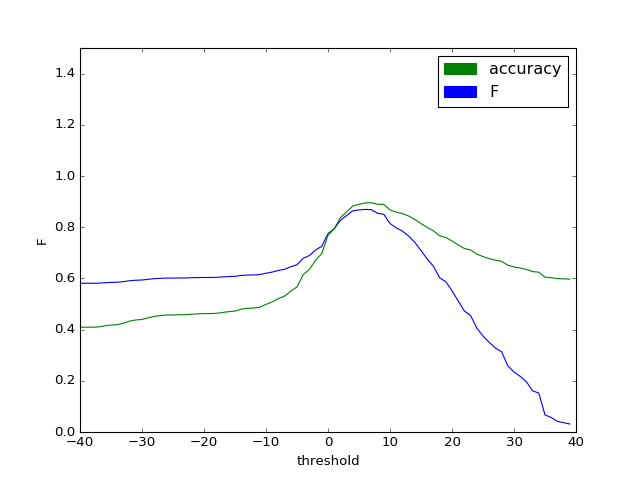

In [1]:
%matplotlib notebook
import random
import numpy as np
from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.patches as mpatches


data = np.loadtxt(open("spambase.data"), delimiter=",",
                  converters={i: (lambda x: 1 if float(x)>0 else 0)  for i in range(47)})
                  # used converters to convert first 47 words to binary model(0 or 1)

train, test, labels_train, labels_test = train_test_split(data[:,:47], data[:,57], test_size=0.20)

N = train.shape[0]                     # Number of documents
S = labels_train.sum()                 # Number of relevant documents

df_t = train.sum(axis=0)               # Words document frequencies
s = train[labels_train>0].sum(axis=0)  # Words relevant document frequencies


def calculate_ct(N, S, s, df_t, alpha=0.001):
    return np.log(
                    ((s+alpha)/(S-s+alpha)) /
                    ((df_t-s+alpha)/(N-df_t-S+s+alpha))
                 )


def accuracy(ct, test, labels_test, threshold=0.5):
    rsvs = (test * ct).sum(axis=1)
    return (((rsvs > threshold) == (labels_test)).sum() / float(len(test)))


def precision(ct, test, labels_test, threshold=0.5):
    rsv_real_positives = (test * ct).sum(axis=1)[labels_test==1]
    total_correct_positives = rsv_real_positives[rsv_real_positives > threshold].shape[0]
    total_real_positives = labels_test.sum()
    
    return total_correct_positives / total_real_positives
    
def recall(ct, test, labels_test, threshold=0.5):
    rsvs = (test * ct).sum(axis=1)
    
    rsv_real_positives = rsvs[labels_test==1]
    total_correct_positives = rsv_real_positives[rsv_real_positives > threshold].shape[0]
    
    total_positives_suggested = rsvs[rsvs>threshold].shape[0]
    try:
        return float(total_correct_positives)  / (total_positives_suggested)
    except:
        return 0
    

def F(ct, test, labels_test, threshold):
    PR = precision(ct, test, labels_test, threshold)
    R = recall(ct, test, labels_test, threshold)
    return (2.0 * PR * R) / (PR + R)

# plotting
fig = plt.figure()
ax = fig.add_subplot(111)

blue_patch = mpatches.Patch(color='blue', label='F')
green_patch = mpatches.Patch(color='green', label='accuracy')
#red_patch = mpatches.Patch(color='red', label='precision')
#black_patch = mpatches.Patch(color='black', label='recall')

ax.legend(handles=[green_patch, blue_patch])
ax.set_ylim([0, 1.5])
ax.set_xlabel('threshold')
ax.set_ylabel('F')
ct=calculate_ct(N, S, s, df_t)
#calculate accuracy for threshold values between -40 and 40
ax.plot(np.arange(-40, 40, 1), [F(ct, test, labels_test, i) for i in np.arange(-40, 40, 1)], color='blue')
ax.plot(np.arange(-40, 40, 1), [accuracy(ct, test, labels_test, i) for i in np.arange(-40, 40, 1)], color='green')
#ax.plot(np.arange(-40, 40, 1), [precision(ct, test, labels_test, i) for i in np.arange(-40, 40, 1)], color='red')
#ax.plot(np.arange(-40, 40, 1), [recall(ct, test, labels_test, i) for i in np.arange(-40, 40, 1)], color='black')


## Find out how accuracy changes when threshold and alpha changes

<IPython.core.display.Javascript object>


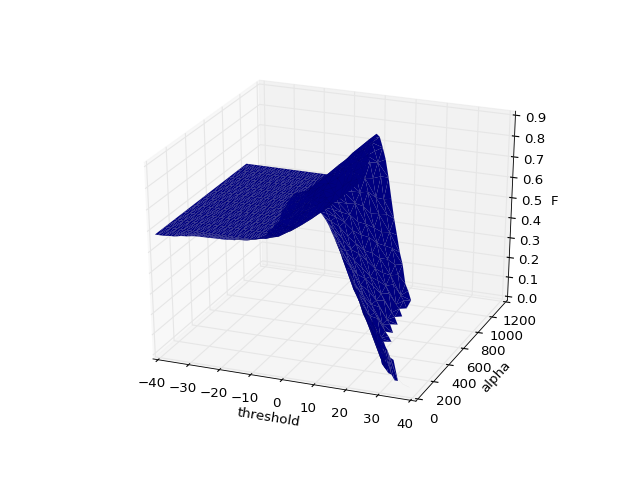

In [3]:
xx, yy = np.meshgrid(np.arange(-40, 40, 1), np.arange(0.01, 1100, 100))
Z = np.c_[xx.ravel(), yy.ravel()]
z = [F(calculate_ct(N, S, s, df_t, alpha=y), test, labels_test, x) for x,y in Z]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('threshold')
ax.set_ylabel('alpha')
ax.set_zlabel('F')
ax.plot_trisurf(xx.ravel(), yy.ravel(), z, cmap=cm.jet, linewidth=0.02)

As you can see smoothing factor(alpha) did not affect the accuracy.

## Conclusion

$\hspace{10 mm}$Although probabilistic model makes too many assumptions that are gravely wrong, it is useful for ranking purposes. One of the assumptions was that, words in the documents are independent of each other. Even though this assumption could break tasks like speech recognition, for information retrieval purposes it is very helpful assumption because IR generally does not depend on the structure of sentences. One drawback of probabilistic model is that you have to recalculate relevancy of all documents, whenever a term relevancy changes. This takes too much time, that's why you might change document relevancies after sum of ct differences exceed a threshold, which is very wrong if the available data is very small. That's why probabilistic model is rarely implemented for large scale Information retrieval applications.